<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE60499](https://ndcbe.github.io/CBE60499);
content is available [on Github](git@github.com:ndcbe/CBE60499.git).*


<!--NAVIGATION-->
< [4.3 Analysis of KKT Conditions](https://ndcbe.github.io/CBE60499/04.03-KKT-Multipliers.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [4.5 Second Order Optimality Conditions](https://ndcbe.github.io/CBE60499/04.05-Second-Order.html) ><p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/04.04-Constraint-Qualifications.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/04.04-Constraint-Qualifications.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 4.4 Constraint Qualifications

## 4.4.1 Feasible Sequences and Limiting Directions

### 4.4.1.1 Concepts

![picture](./figures/limiting_directions.png)

![picture](./figures/thm-4-8.png)

### 4.4.1.2 Linear Constrainted Optimization Problems

![picture](./figures/linear-opt-4-3.png)

![picture](./figures/thm-4-9.png)

![picture](./figures/thm-4-11.png)

## 4.4.2 Constraint Qualifications

### 4.4.2.1 Nonlinear Constrained Optimization Problems

![picture](./figures/nonlinear-opt-4-3.png)

![picture](./figures/nonlinear-opt-4-3b.png)

### 4.4.2.2 Linearly Independent Constraint Qualification (LICQ)

![picture](./figures/def-4-12.png)

![picture](./figures/thm-4-14.png)

![picture](./figures/thm-4-15.png)

### 4.4.2.3 Mangasarian-Fromovitz Constraint Qualification (MFCQ)

![picture](./figures/thm-4-16.png)

## 4.4.3 Example


Consider the following two dimensional optimization problem:

$$
\begin{align} \min_{x_1,x_2} \quad & f(x) := x_1 \\
\mathrm{s.t.} \quad & g_1(x) := x_2 \leq x_1^3 \\
 & g_2(x) := -x_1^3 \leq x_2
\end{align}
$$

This is an example from Section 4.3 in Nonlinear Programming by Biegler.

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pyomo.environ import *

### 4.4.3.1 Visualize Feasible Set

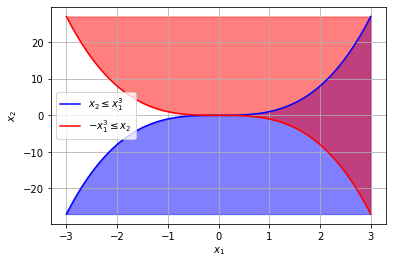

In [5]:
n = 101
x1 = np.linspace(-3,3,n)
plt.figure()

g1 = np.power(x1,3)
g2 = -g1

plt.plot(x1,g1,color="blue",linestyle="-",label="$x_2 \leq x_1^3$")
plt.fill_between(x1,g1,np.min(g1)*np.ones(n),color="blue",alpha=0.5)


plt.plot(x1,g2,color="red",linestyle="-",label="$-x_1^3 \leq x_2$")
plt.fill_between(x1,np.max(g2)*np.ones(n),g2,color="red",alpha=0.5)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.grid()
plt.legend(loc="center left")
plt.show()

**Discussion**

Where on the graph are both constraints satisfied? Choices:
1. White region
2. Blue region
3. Red region
4. Purple region

### 4.4.3.2 Solve with Pyomo

In [4]:
## Create concrete Pyomo model
m = ConcreteModel()

## Set up to extract dual variables after model solve.
m.dual = Suffix(direction=Suffix.IMPORT)

## Declare variables with initial values
m.x1 = Var(initialize=1)
m.x2 = Var(initialize=1)

## Declare objective
m.OBJ = Objective(expr=m.x1, sense = minimize)

m.g1 = Constraint(expr=m.x2 <= m.x1**3)

m.g2 = Constraint(expr=-m.x1**3 <= m.x2)

## Specify IPOPT as solver
solver = SolverFactory('ipopt')

## Solve the model
results = solver.solve(m, tee = True)

## Return the solution
print("x1 = ",value(m.x1))
print("x2 = ",value(m.x2))
print("\n")

## Inspect dual variables
m.dual.display()

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of ineq

**Discussion**
1. Why so many iterations for such a simple problem?
2. Why are the multipliers so negative?
3. Are the constraints satisfied?
4. Why is the solution not exactly $x_1 = x_2 = 0$?

<!--NAVIGATION-->
< [4.3 Analysis of KKT Conditions](https://ndcbe.github.io/CBE60499/04.03-KKT-Multipliers.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [4.5 Second Order Optimality Conditions](https://ndcbe.github.io/CBE60499/04.05-Second-Order.html) ><p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/04.04-Constraint-Qualifications.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/04.04-Constraint-Qualifications.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>